**Importing Required Libraries**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv(r"C:\Users\mythi\Downloads\data\data\demo_data\3.concertriccir2.csv",header=None)

In [4]:
df.head()

,0,1,2
0,0.700335,-0.247068,0.0
1,-3.950019,2.740080,1.0
2,0.150222,-2.157638,1.0
3,-1.672050,-0.941519,1.0
4,2.560483,-1.846577,1.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       500 non-null    float64
 1   1       500 non-null    float64
 2   2       500 non-null    float64
dtypes: float64(3)
memory usage: 11.8 KB


<AxesSubplot:xlabel='0', ylabel='1'>

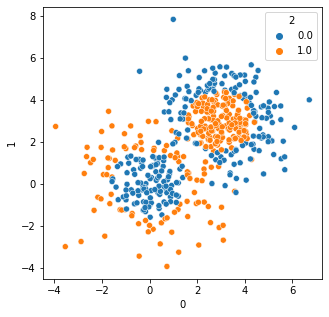

In [6]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=df[0],y=df[1],hue=df[2])

**Splitting train and test data**

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df[[0,1]], df[2], train_size = 0.8)

In [8]:
#Shape of 'x_train' and 'y_train'

print(x_train.shape,y_train.shape)

#Shape of 'x_test' and 'y_test'

print(x_test.shape,y_test.shape)

(400, 2) (400,)
(100, 2) (100,)


**Standardizing the train data**

In [9]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

In [10]:
std_train=std.fit_transform(x_train)

In [11]:
std_train

array([[ 8.42971680e-01,  5.74472577e-01],
       [ 1.10772531e+00,  1.09648482e+00],
       [-1.24155831e+00, -1.13347278e+00],
       [-1.11459176e+00, -1.59027693e+00],
       [ 8.66975205e-01, -1.91841459e-01],
       [ 8.07120648e-01,  1.28101140e+00],
       [ 1.26213580e-01,  1.98712760e-01],
       [-1.16168852e+00, -4.56650298e-01],
       [-1.50706922e+00, -1.28443820e-01],
       [ 2.18419048e+00,  3.75163100e-01],
       [ 1.12810734e+00,  2.16300971e-01],
       [ 2.76078638e-01,  1.37400449e+00],
       [ 9.90221776e-01,  4.95886908e-01],
       [ 2.80037000e-01,  9.21159400e-01],
       [-2.44483708e-01, -3.20951303e-01],
       [ 8.98691469e-01,  1.57312788e+00],
       [ 4.48824585e-01,  1.01962329e+00],
       [ 5.84210443e-01, -1.58846505e-01],
       [-8.69968363e-01, -3.51909314e-01],
       [ 1.06849600e+00,  4.54565077e-01],
       [ 6.24165402e-01, -2.30935382e+00],
       [ 3.44445339e-01, -1.89235803e+00],
       [-1.22795530e+00, -1.91844444e+00],
       [-2.

**Craeting Dense Layers**

In [12]:
import tensorflow
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [14]:
model=Sequential()
model.add(Dense(10, activation = 'relu', input_dim = 2, kernel_initializer='he_uniform'))
model.add(Dense(8, activation = 'relu', kernel_initializer='he_uniform'))
model.add(Dense(6, activation = 'relu', kernel_initializer='he_uniform'))
model.add(Dense(4, activation = 'relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation = 'sigmoid'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30        
                                                                 
 dense_1 (Dense)             (None, 8)                 88        
                                                                 
 dense_2 (Dense)             (None, 6)                 54        
                                                                 
 dense_3 (Dense)             (None, 4)                 28        
                                                                 
 dense_4 (Dense)             (None, 1)                 5         
                                                                 
Total params: 205
Trainable params: 205
Non-trainable params: 0
_________________________________________________________________


**Compile**

In [16]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

**Fitting**

In [18]:
model.fit(x_train, y_train, batch_size=10, epochs = 900, verbose=1, validation_split= 0.1)

Epoch 1/900
36/36 [==============================] - 7s 12ms/step - loss: 0.7173 - accuracy: 0.3806 - val_loss: 0.7008 - val_accuracy: 0.4750
Epoch 2/900
36/36 [==============================] - 0s 3ms/step - loss: 0.6977 - accuracy: 0.4917 - val_loss: 0.6966 - val_accuracy: 0.5000
Epoch 3/900
36/36 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6955 - val_accuracy: 0.5250
Epoch 4/900
36/36 [==============================] - 0s 3ms/step - loss: 0.6895 - accuracy: 0.4917 - val_loss: 0.6933 - val_accuracy: 0.5500
Epoch 5/900
36/36 [==============================] - 0s 3ms/step - loss: 0.6862 - accuracy: 0.5222 - val_loss: 0.6883 - val_accuracy: 0.4750
Epoch 6/900
36/36 [==============================] - 0s 3ms/step - loss: 0.6827 - accuracy: 0.4500 - val_loss: 0.6838 - val_accuracy: 0.5500
Epoch 7/900
36/36 [==============================] - 0s 3ms/step - loss: 0.6783 - accuracy: 0.5139 - val_loss: 0.6819 - val_accuracy: 0.4000
Epoch 8/900


In [19]:
from mlxtend.plotting import plot_decision_regions

2430/2430 [==============================] - 5s 1ms/step


<AxesSubplot:>

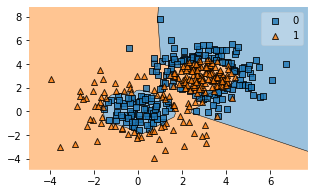

In [20]:
plt.figure(figsize = (5,3))
plot_decision_regions(x_train[[0,1]].values,y_train.values.astype(int),clf=model)

In [21]:
pred_train = model.predict(x_train)

13/13 [==============================] - 0s 1ms/step


In [22]:
import numpy as np
train_pred = np.where(pred_train<0.5,0,1)

In [23]:
train_pred.shape

(400, 1)

In [24]:
pred_train=train_pred.flatten()

In [25]:
pred_train.shape

(400,)

<AxesSubplot:xlabel='0', ylabel='1'>

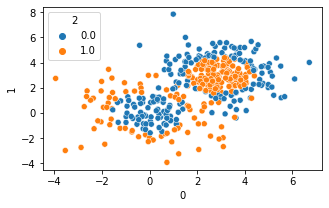

In [26]:
plt.figure(figsize=(5,3))
sns.scatterplot(x=x_train[0],y=x_train[1],hue=y_train)

<AxesSubplot:xlabel='0', ylabel='1'>

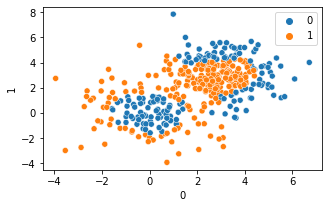

In [27]:
plt.figure(figsize = (5,3))
sns.scatterplot(x=x_train[0],y=x_train[1],hue=pred_train)

2430/2430 [==============================] - 3s 1ms/step


<AxesSubplot:>

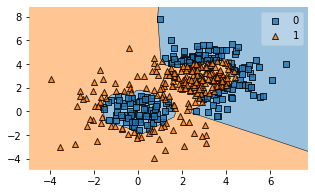

In [28]:
plt.figure(figsize = (5,3))
plot_decision_regions(x_train[[0,1]].values,pred_train.astype(int),clf=model)

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
accuracy_score(y_train, pred_train)

0.8975